## Dữ liệu

In [1]:
import pandas as pd

# Đọc file Parquet vào DataFrame
df = pd.read_parquet('0000.parquet')

# Chỉ lấy 200 dòng đầu tiên
# df = df.head(1000)

# Tiếp tục xử lý dữ liệu như thông thường
df['sentence'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))
df['Ner'] = df['ner_tags'].apply(lambda tokens: ' '.join(tokens))
df

tokens  \
0     [Đồng, thời, ,, bệnh, viện, tiếp, tục, thực, h...   
1     [", Số, bệnh, viện, có, thể, tiếp, nhận, bệnh,...   
2     [Ngoài, ra, ,, những, người, tiếp, xúc, gián, ...   
3     [Bà, này, khi, trở, về, quá, cảnh, Doha, (, Qa...   
4     [", Bệnh, nhân, 523, ", và, chồng, là, ", bệnh...   
...                                                 ...   
5022  [Liên, quan, đến, Bệnh, viện, Bạch, Mai, ,, ôn...   
5023  [Mẫu, lần, hai, ngày, 22/7, kết, quả, sàng, lọ...   
5024  [Đây, là, 5, trường, hợp, dương, tính, được, B...   
5025  [Lúc, 17h, ngày, 7, -, 3, ,, Viện, Vệ, sinh, D...   
5026  [Ngày, 12/8, ,, anh, được, cách, ly, tập, trun...   

                                               ner_tags  \
0     [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
1     [O, O, O, O, O, O, O, O, O, O, O, B-SYMPTOM_AN...   
2     [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
3     [O, O, O, O, O, O, O, B-LOCATION, O, B-LOCATIO...   
4     [O, O, O, B-PATIENT_ID, O, O, O, O, O, O, O, B...   
...                                                 ...   
5022  [O, O, O, B-LOCATION, I-LOCATION, I-LOCATION, ...   
5023          [O, O, O, O, B-DATE, O, O, O, O, O, O, O]   
5024  [O, O, O, O, O, O, O, O, B-ORGANIZATION, I-ORG...   
5025  [O, O, O, B-DATE, I-DATE, I-DATE, O, B-ORGANIZ...   
5026  [O, B-DATE, O, O, O, O, O, O, O, O, O, B-DATE,...   

                                               sentence  \
0     Đồng thời , bệnh viện tiếp tục thực hiện các b...   
1     " Số bệnh viện có thể tiếp nhận bệnh nhân bị s...   
2     Ngoài ra , những người tiếp xúc gián tiếp ( đã...   
3     Bà này khi trở về quá cảnh Doha ( Qatar ) , đá...   
4     " Bệnh nhân 523 " và chồng là " bệnh nhân 522 ...   
...                                                 ...   
5022  Liên quan đến Bệnh viện Bạch Mai , ông Dương c...   
5023  Mẫu lần hai ngày 22/7 kết quả sàng lọc dương t...   
5024  Đây là 5 trường hợp dương tính được Bộ Y tế cô...   
5025  Lúc 17h ngày 7 - 3 , Viện Vệ sinh Dịch tễ Trun...   
5026  Ngày 12/8 , anh được cách ly tập trung , ngày ...   

                                                    Ner  
0     O O O O O O O O O O O O O O O O O O O O O O O ...  
1     O O O O O O O O O O O B-SYMPTOM_AND_DISEASE I-...  
2     O O O O O O O O O O O O O O O O O O O O O O O ...  
3     O O O O O O O B-LOCATION O B-LOCATION O O O O ...  
4     O O O B-PATIENT_ID O O O O O O O B-PATIENT_ID ...  
...                                                 ...  
5022  O O O B-LOCATION I-LOCATION I-LOCATION I-LOCAT...  
5023                       O O O O B-DATE O O O O O O O  
5024  O O O O O O O O B-ORGANIZATION I-ORGANIZATION ...  
5025  O O O B-DATE I-DATE I-DATE O B-ORGANIZATION I-...  
5026  O B-DATE O O O O O O O O O B-DATE O O O O O O ...  

[5027 rows x 4 columns]

In [2]:
# Lưu DataFrame vào file Excel
df.to_excel('NER_covid_vietnamese_Covid.xlsx', index=False)

In [3]:
# Chuyển đổi dữ liệu
X = []
y = []

for idx, row in df.iterrows():
    words = row['sentence'].split()  # Tách các từ trong câu
    labels = row['Ner'].split()  # Tách các nhãn tương ứng

    for word, label in zip(words, labels):
        X.append({'word': word})  # Thêm từ vào danh sách X
        y.append(label)  # Thêm nhãn vào danh sách y

# In ra và kiểm tra kết quả (in ra tối đa 200 dòng)
# for i in range(min(len(X), 200)): # Lấy 200 dữ liệu
#     print(X[i], y[i])
for i in range(len(X)):
    print(X[i], y[i])

{'word': 'Đồng'} O
{'word': 'thời'} O
{'word': ','} O
{'word': 'bệnh'} O
{'word': 'viện'} O
{'word': 'tiếp'} O
{'word': 'tục'} O
{'word': 'thực'} O
{'word': 'hiện'} O
{'word': 'các'} O
{'word': 'biện'} O
{'word': 'pháp'} O
{'word': 'phòng'} O
{'word': 'chống'} O
{'word': 'dịch'} O
{'word': 'bệnh'} O
{'word': 'COVID'} O
{'word': '-'} O
{'word': '19'} O
{'word': 'theo'} O
{'word': 'hướng'} O
{'word': 'dẫn'} O
{'word': 'của'} O
{'word': 'Bộ'} B-ORGANIZATION
{'word': 'Y'} I-ORGANIZATION
{'word': 'tế'} I-ORGANIZATION
{'word': '.'} O
{'word': '"'} O
{'word': 'Số'} O
{'word': 'bệnh'} O
{'word': 'viện'} O
{'word': 'có'} O
{'word': 'thể'} O
{'word': 'tiếp'} O
{'word': 'nhận'} O
{'word': 'bệnh'} O
{'word': 'nhân'} O
{'word': 'bị'} O
{'word': 'sốt'} B-SYMPTOM_AND_DISEASE
{'word': 'cao'} I-SYMPTOM_AND_DISEASE
{'word': 'và'} O
{'word': 'khó'} B-SYMPTOM_AND_DISEASE
{'word': 'thở'} I-SYMPTOM_AND_DISEASE
{'word': 'đang'} O
{'word': 'giảm'} O
{'word': 'dần'} O
{'word': '"'} O
{'word': ','} O
{'word': '

In [4]:
X

[{'word': 'Đồng'},
 {'word': 'thời'},
 {'word': ','},
 {'word': 'bệnh'},
 {'word': 'viện'},
 {'word': 'tiếp'},
 {'word': 'tục'},
 {'word': 'thực'},
 {'word': 'hiện'},
 {'word': 'các'},
 {'word': 'biện'},
 {'word': 'pháp'},
 {'word': 'phòng'},
 {'word': 'chống'},
 {'word': 'dịch'},
 {'word': 'bệnh'},
 {'word': 'COVID'},
 {'word': '-'},
 {'word': '19'},
 {'word': 'theo'},
 {'word': 'hướng'},
 {'word': 'dẫn'},
 {'word': 'của'},
 {'word': 'Bộ'},
 {'word': 'Y'},
 {'word': 'tế'},
 {'word': '.'},
 {'word': '"'},
 {'word': 'Số'},
 {'word': 'bệnh'},
 {'word': 'viện'},
 {'word': 'có'},
 {'word': 'thể'},
 {'word': 'tiếp'},
 {'word': 'nhận'},
 {'word': 'bệnh'},
 {'word': 'nhân'},
 {'word': 'bị'},
 {'word': 'sốt'},
 {'word': 'cao'},
 {'word': 'và'},
 {'word': 'khó'},
 {'word': 'thở'},
 {'word': 'đang'},
 {'word': 'giảm'},
 {'word': 'dần'},
 {'word': '"'},
 {'word': ','},
 {'word': 'thông'},
 {'word': 'cáo'},
 {'word': 'có'},
 {'word': 'đoạn'},
 {'word': ','},
 {'word': 'cảnh'},
 {'word': 'báo'},
 {

In [5]:
y

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-ORGANIZATION',
 'I-ORGANIZATION',
 'I-ORGANIZATION',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-SYMPTOM_AND_DISEASE',
 'I-SYMPTOM_AND_DISEASE',
 'O',
 'B-SYMPTOM_AND_DISEASE',
 'I-SYMPTOM_AND_DISEASE',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-LOCATION',
 'O',
 'B-LOCATION',
 'O',
 'O',
 'O',
 'O',
 'B-LOCATION',
 'I-LOCATION',
 'I-L

## Thư viện

In [6]:
import pandas as pd

# Đọc file Parquet vào DataFrame
df = pd.read_parquet('0000.parquet')

# Chỉ lấy 200 dòng đầu tiên
df = df.head(200)

# Tiếp tục xử lý dữ liệu như thông thường
df['sentence'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))
df['Ner'] = df['ner_tags'].apply(lambda tokens: ' '.join(tokens))

# Chuyển đổi dữ liệu
X = df['sentence'].tolist()
y = df['Ner'].tolist()


In [7]:
X

['Đồng thời , bệnh viện tiếp tục thực hiện các biện pháp phòng chống dịch bệnh COVID - 19 theo hướng dẫn của Bộ Y tế .',
 '" Số bệnh viện có thể tiếp nhận bệnh nhân bị sốt cao và khó thở đang giảm dần " , thông cáo có đoạn , cảnh báo những bệnh nhân này thay vào đó được chuyển tới các phòng khám khẩn cấp , khiến những bệnh nhân mắc bệnh hiểm nghèo khác không có cơ hội được điều trị .',
 'Ngoài ra , những người tiếp xúc gián tiếp ( đã gặp những người tiếp xúc gần với bệnh nhân ) được lập danh sách và yêu cầu cách ly y tế tại nơi ở .',
 'Bà này khi trở về quá cảnh Doha ( Qatar ) , đáp xuống Tân Sơn Nhất sáng 2/3 cùng 75 hành khách , trong đó có 55 người nước ngoài .',
 '" Bệnh nhân 523 " và chồng là " bệnh nhân 522 " , 67 tuổi , được Bộ Y tế ghi nhận nhiễm nCoV hôm 31/7 .',
 'Trường hợp bệnh nhân 188 L.T.H. , theo thông tin từ cơ quan y tế địa phương , bệnh nhân về nhà ngày 14 - 4 và từ đó chỉ tiếp xúc với chồng và con , đây không phải là tái nhiễm mà do có thể virus yếu ở thời điểm lấy 

In [8]:
from sklearn.model_selection import train_test_split
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_test

['Bệnh nhân hiện đã hết nCoV , điều trị tiếp tại Bệnh viện Chợ Rẫy .',
 'Những người vào trung tâm cách ly được xếp ở chung phòng một cách ngẫu nhiên .',
 'Bác sĩ Hùng cho biết diễn biến bệnh của bệnh nhân nhanh và phức tạp , khi vào viện đã trong tình trạng nguy kịch , phổi tổn thương nặng , suy hô hấp và đã có biến chứng suy đa tạng , tính mạng bị đe doạ .',
 'Như vậy , chỉ riêng đường lây nhiễm liên quan bar Buddha hiện có 8 bệnh nhân gồm 7 người nước ngoài ( khách đến bar chơi ) , một người Việt là nhân viên phục vụ bàn .',
 'Như vậy , đến thời điểm này , nước ta đã có 949 trong tổng số 1.068 bệnh nhân mắc COVID - 19 được công bố khỏi bệnh , 35 ca tử vong .',
 'Bệnh nhân 612 ( phường An Hải Tây , quận Sơn Trà , Đà Nẵng ) : Tiếp xúc gần với mẹ là Đ.T.X.L ( bệnh nhân 480 ) .',
 'Ngày 20/3 , bệnh nhân sốt , xét nghiệm dương tính nCoV , chuyển viện .',
 'Trong những ngày qua , các bác sĩ , điều dưỡng của Khoa hồi sức tích cực Bệnh viện Bệnh nhiệt đới trung ương và tổ chuyên gia 30 ngườ

### stanza

In [10]:
import stanza

# Tải model của stanza cho Tiếng Việt
stanza.download("vi")

# Khởi tạo pipeline cho xử lý văn bản
nlp = stanza.Pipeline("vi", processors="tokenize,ner")

# Ví dụ với tiếng Việt
doc_list = []
for sentence in X_test:
    doc = nlp(sentence)
    doc_list.append(doc)

# Ví dụ với tiếng Việt
for doc in doc_list:
    for sent in doc.sentences:
        for token in sent.tokens:
            print(f"Token: {token.text}\tNER Label: {token.ner}")
    print()  # In một dòng trống sau mỗi câu


d:\Python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-29 07:53:42 INFO: Downloaded file to C:\Users\MSI\stanza_resources\resources.json
2024-06-29 07:53:42 INFO: Downloading default packages for language: vi (Vietnamese) ...
2024-06-29 07:53:44 INFO: File exists: C:\Users\MSI\stanza_resources\vi\default.zip
2024-06-29 07:53:48 INFO: Finished downloading models and saved to C:\Users\MSI\stanza_resources
2024-06-29 07:53:48 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-06-29 07:53:49 INFO: Downloaded file to C:\Users\MSI\stanza_resources\resources.json
2024-06-29 07:53:50 INFO: Loading these models for language: vi (Vietnamese):
| Processor | Package |
-

Token: Bệnh	NER Label: O
Token: nhân	NER Label: O
Token: hiện	NER Label: O
Token: đã	NER Label: O
Token: hết	NER Label: O
Token: nCoV	NER Label: O
Token: ,	NER Label: O
Token: điều	NER Label: O
Token: trị tiếp	NER Label: O
Token: tại	NER Label: O
Token: Bệnh	NER Label: B-ORGANIZATION
Token: viện	NER Label: I-ORGANIZATION
Token: Chợ Rẫy	NER Label: E-ORGANIZATION
Token: .	NER Label: O

Token: Những	NER Label: O
Token: người	NER Label: O
Token: vào	NER Label: O
Token: trung tâm	NER Label: O
Token: cách	NER Label: O
Token: ly	NER Label: O
Token: được	NER Label: O
Token: xếp	NER Label: O
Token: ở	NER Label: O
Token: chung phòng	NER Label: O
Token: một cách	NER Label: O
Token: ngẫu nhiên	NER Label: O
Token: .	NER Label: O

Token: Bác sĩ	NER Label: O
Token: Hùng	NER Label: S-PERSON
Token: cho	NER Label: O
Token: biết	NER Label: O
Token: diễn	NER Label: O
Token: biến	NER Label: O
Token: bệnh	NER Label: O
Token: của	NER Label: O
Token: bệnh nhân	NER Label: O
Token: nhanh	NER Label: O
Token: và	

In [11]:
import random
import stanza
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Chọn một dòng dữ liệu bất kỳ trong X_test
index = random.randint(0, len(X_test) - 1)
sentence_to_compare = X_test[index]
actual_labels = y_test[index]  # Nhãn thực tế của dòng này

# Tải model của stanza cho Tiếng Việt (nếu chưa tải)
stanza.download("vi")

# Khởi tạo pipeline cho xử lý văn bản
nlp = stanza.Pipeline("vi", processors="tokenize,ner")

# Dự đoán nhãn NER và chỉ lấy các từ
predicted_words = []
doc = nlp(sentence_to_compare)
for sent in doc.sentences:
    for token in sent.tokens:
        predicted_words.append(token.text)

# Tính toán số lượng từ dự đoán đúng
correct_count = 0
actual_labels=actual_labels.split()
predictedlabel=[]
for word, actual_label in zip(predicted_words, actual_labels):
    # Dự đoán nhãn NER cho từ đó
    predicted_label = token.ner
    predictedlabel.append(predicted_label)
    # So sánh nhãn dự đoán với nhãn thực tế
    if predicted_label == actual_label:
        correct_count += 1

total_count = len(predicted_words)
accuracy = correct_count / total_count if total_count > 0 else 0

# In ra kết quả
print(f"Văn bản: {sentence_to_compare}")
print(f"Từ dự đoán: {predicted_words}")
print(f"Nhãn thực tế: {actual_labels}")
print(f"Nhãn dự đoán: {predictedlabel}")
print(f"Số từ dự đoán đúng: {correct_count} trên {total_count}")
print(f"Tỷ lệ dự đoán đúng: {accuracy:.2%}")


2024-06-29 07:54:02 INFO: Downloaded file to C:\Users\MSI\stanza_resources\resources.json
2024-06-29 07:54:02 INFO: Downloading default packages for language: vi (Vietnamese) ...
2024-06-29 07:54:03 INFO: File exists: C:\Users\MSI\stanza_resources\vi\default.zip
2024-06-29 07:54:08 INFO: Finished downloading models and saved to C:\Users\MSI\stanza_resources
2024-06-29 07:54:08 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-06-29 07:54:09 INFO: Downloaded file to C:\Users\MSI\stanza_resources\resources.json
2024-06-29 07:54:10 INFO: Loading these models for language: vi (Vietnamese):
| Processor | Package |
-----------------------
| tokenize  | vtb     |
| ner       | vlsp    |

2024-06-29 07:54:10 INFO: Using device: cpu
2024-06-29 07:54:10 INFO: Loading: tokenize
2024-06-29 07:54:10 INFO: Loading: ner
2024-06-29 07:54:10 INFO: Done loa

Văn bản: Bệnh nhân 67 ( 36 tuổi ) trú tại thôn Văn Lâm 3 , xã Phước Nam , huyện Thuận Nam .
Từ dự đoán: ['Bệnh nhân', '67', '(', '36', 'tuổi', ')', 'trú', 'tại', 'thôn', 'Văn Lâm', '3', ',', 'xã', 'Phước Nam', ',', 'huyện', 'Thuận Nam', '.']
Nhãn thực tế: ['O', 'O', 'B-PATIENT_ID', 'O', 'B-AGE', 'O', 'O', 'O', 'O', 'B-LOCATION', 'I-LOCATION', 'I-LOCATION', 'I-LOCATION', 'O', 'B-LOCATION', 'I-LOCATION', 'I-LOCATION', 'O', 'B-LOCATION', 'I-LOCATION', 'I-LOCATION', 'O']
Nhãn dự đoán: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Số từ dự đoán đúng: 9 trên 18
Tỷ lệ dự đoán đúng: 50.00%


In [12]:
import stanza
from sklearn.metrics import classification_report

# Tải model của stanza cho Tiếng Việt (nếu chưa tải)
stanza.download("vi")

# Khởi tạo pipeline cho xử lý văn bản
nlp = stanza.Pipeline("vi", processors="tokenize,ner")

# Dự đoán và thu thập kết quả
predicted_labels = []
actual_labels_flat = []

accuracies = []  # List để lưu tỷ lệ dự đoán đúng của mỗi câu

for sentence, actual_labels in zip(X_test, y_test):
    # Dự đoán nhãn NER và chỉ lấy các từ
    predicted_words = []
    doc = nlp(sentence)
    for sent in doc.sentences:
        for token in sent.tokens:
            predicted_words.append(token.text)

    # Tính toán số lượng từ dự đoán đúng
    correct_count = 0
    actual_labels_list = actual_labels.split()
    predicted_labels_sentence = []  # Tạo list để lưu trữ nhãn dự đoán cho câu hiện tại

    for token, actual_label in zip(doc.iter_tokens(), actual_labels_list):
        predicted_label = token.ner
        predicted_labels.append(predicted_label)
        actual_labels_flat.append(actual_label)
        predicted_labels_sentence.append(predicted_label)
        # So sánh nhãn dự đoán với nhãn thực tế
        if predicted_label == actual_label:
            correct_count += 1

    total_count = len(predicted_words)
    accuracy = correct_count / total_count if total_count > 0 else 0
    accuracies.append(accuracy)

    # In ra kết quả cho từng câu
    print(f"Văn bản: {sentence}")
    print(f"Từ dự đoán: {predicted_words}")
    print(f"Nhãn thực tế: {actual_labels_list}")
    print(f"Nhãn dự đoán: {predicted_labels_sentence}")
    print(f"Số từ dự đoán đúng: {correct_count} trên {total_count}")
    print(f"Tỷ lệ dự đoán đúng: {accuracy:.2%}")
    print()


2024-06-29 07:54:11 INFO: Downloaded file to C:\Users\MSI\stanza_resources\resources.json
2024-06-29 07:54:11 INFO: Downloading default packages for language: vi (Vietnamese) ...
2024-06-29 07:54:13 INFO: File exists: C:\Users\MSI\stanza_resources\vi\default.zip
2024-06-29 07:54:17 INFO: Finished downloading models and saved to C:\Users\MSI\stanza_resources
2024-06-29 07:54:17 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-06-29 07:54:18 INFO: Downloaded file to C:\Users\MSI\stanza_resources\resources.json
2024-06-29 07:54:19 INFO: Loading these models for language: vi (Vietnamese):
| Processor | Package |
-----------------------
| tokenize  | vtb     |
| ner       | vlsp    |

2024-06-29 07:54:19 INFO: Using device: cpu
2024-06-29 07:54:19 INFO: Loading: tokenize
2024-06-29 07:54:19 INFO: Loading: ner
2024-06-29 07:54:20 INFO: Done loa

Văn bản: Bệnh nhân hiện đã hết nCoV , điều trị tiếp tại Bệnh viện Chợ Rẫy .
Từ dự đoán: ['Bệnh', 'nhân', 'hiện', 'đã', 'hết', 'nCoV', ',', 'điều', 'trị tiếp', 'tại', 'Bệnh', 'viện', 'Chợ Rẫy', '.']
Nhãn thực tế: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOCATION', 'I-LOCATION', 'I-LOCATION', 'I-LOCATION', 'O']
Nhãn dự đoán: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORGANIZATION', 'I-ORGANIZATION', 'E-ORGANIZATION', 'O']
Số từ dự đoán đúng: 10 trên 14
Tỷ lệ dự đoán đúng: 71.43%

Văn bản: Những người vào trung tâm cách ly được xếp ở chung phòng một cách ngẫu nhiên .
Từ dự đoán: ['Những', 'người', 'vào', 'trung tâm', 'cách', 'ly', 'được', 'xếp', 'ở', 'chung phòng', 'một cách', 'ngẫu nhiên', '.']
Nhãn thực tế: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Nhãn dự đoán: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Số từ dự đoán đúng: 13 trên 13
Tỷ lệ dự đoán đúng: 100.00%

Văn bản: Bác sĩ Hùng cho biết

In [13]:
# Tính trung bình cộng tỷ lệ dự đoán đúng mỗi câu
average_accuracy = sum(accuracies) / len(accuracies) if accuracies else 0
print(f"Tỷ lệ dự đoán đúng trung bình: {average_accuracy:.2%}")

# In ra classification report
print("\nBáo cáo phân loại (classification report):")
print(classification_report(actual_labels_flat, predicted_labels))
classification_report_stanza=classification_report(actual_labels_flat, predicted_labels, output_dict=True)

Tỷ lệ dự đoán đúng trung bình: 72.77%

Báo cáo phân loại (classification report):
                       precision    recall  f1-score   support

                B-AGE       0.00      0.00      0.00         7
               B-DATE       0.00      0.00      0.00        15
             B-GENDER       0.00      0.00      0.00         5
                B-JOB       0.00      0.00      0.00         2
           B-LOCATION       0.10      0.05      0.06        42
      B-MISCELLANEOUS       0.00      0.00      0.00         0
               B-NAME       0.00      0.00      0.00         1
       B-ORGANIZATION       0.07      0.20      0.10         5
         B-PATIENT_ID       0.00      0.00      0.00        27
B-SYMPTOM_AND_DISEASE       0.00      0.00      0.00         3
     B-TRANSPORTATION       0.00      0.00      0.00         2
           E-LOCATION       0.00      0.00      0.00         0
      E-MISCELLANEOUS       0.00      0.00      0.00         0
       E-ORGANIZATION       0.00   

d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: 

In [20]:
import stanza

# Tải model của stanza cho Tiếng Việt
stanza.download("vi")

# Khởi tạo pipeline cho xử lý văn bản
nlp = stanza.Pipeline("vi", processors="tokenize,ner")
sen=['Đó là con đường biển ngắn nhất để đi từ Ấn_Độ_Dương sang Thái_Bình_Dương']
# Ví dụ với tiếng Việt
doc_list = []
for sentence in sen:
    doc = nlp(sentence)
    doc_list.append(doc)

# Ví dụ với tiếng Việt
for doc in doc_list:
    for sent in doc.sentences:
        for token in sent.tokens:
            print(f"Token: {token.text}\tNER Label: {token.ner}")
    print()  # In một dòng trống sau mỗi câu


2024-06-29 08:04:03 INFO: Downloaded file to C:\Users\MSI\stanza_resources\resources.json
2024-06-29 08:04:03 INFO: Downloading default packages for language: vi (Vietnamese) ...
2024-06-29 08:04:04 INFO: File exists: C:\Users\MSI\stanza_resources\vi\default.zip
2024-06-29 08:04:10 INFO: Finished downloading models and saved to C:\Users\MSI\stanza_resources
2024-06-29 08:04:10 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-06-29 08:04:12 INFO: Downloaded file to C:\Users\MSI\stanza_resources\resources.json
2024-06-29 08:04:12 INFO: Loading these models for language: vi (Vietnamese):
| Processor | Package |
-----------------------
| tokenize  | vtb     |
| ner       | vlsp    |

2024-06-29 08:04:12 INFO: Using device: cpu
2024-06-29 08:04:12 INFO: Loading: tokenize
2024-06-29 08:04:12 INFO: Loading: ner
2024-06-29 08:04:14 INFO: Done loa

Token: Đó	NER Label: O
Token: là	NER Label: O
Token: con	NER Label: O
Token: đường biển ngắn nhất	NER Label: O
Token: để	NER Label: O
Token: đi	NER Label: O
Token: từ	NER Label: O
Token: Ấn	NER Label: B-LOCATION
Token: _Độ_Dương	NER Label: E-LOCATION
Token: sang	NER Label: O
Token: Thái_Bình_Dương	NER Label: S-LOCATION



### underthesea

In [ ]:
from underthesea import ner

def predict_entities_underthesea(sentence):
    entities = ner(sentence)
    return entities

sentence = "Đó là con đường biển ngắn nhất để đi từ Ấn_Độ_Dương sang Thái_Bình_Dương"

entities = predict_entities_underthesea(sentence)
for entity in entities:
    print(f"Thực thể: {entity[0]}, Nhãn: {entity[3]}")


Thực thể: Bộ, Nhãn: O
Thực thể: Y tế, Nhãn: O
Thực thể: yêu cầu, Nhãn: O
Thực thể: TP, Nhãn: B-LOC
Thực thể: HCM, Nhãn: I-LOC
Thực thể: tổ chức, Nhãn: O
Thực thể: khẩn cấp, Nhãn: O
Thực thể: truy vết, Nhãn: O
Thực thể: toàn bộ, Nhãn: B-LOC
Thực thể: F1, Nhãn: I-LOC
Thực thể: ,, Nhãn: O
Thực thể: F2, Nhãn: I-LOC
Thực thể: của, Nhãn: O
Thực thể: bệnh nhân, Nhãn: B-LOC
Thực thể: COVID-19, Nhãn: I-LOC
Thực thể: mới, Nhãn: O
Thực thể: phát hiện, Nhãn: O
Thực thể: ., Nhãn: O


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from underthesea import ner

# Đọc file Parquet vào DataFrame
df = pd.read_parquet('0000.parquet')

# Chỉ lấy 200 dòng đầu tiên
df = df.head(1000)

# Tiếp tục xử lý dữ liệu như thông thường
df['sentence'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))
df['Ner'] = df['ner_tags'].apply(lambda tokens: ' '.join(tokens))

# Chuyển đổi dữ liệu
X = df['sentence'].tolist()
y = df['Ner'].tolist()

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dự đoán và thu thập kết quả với Underthesea
predicted_labels_underthesea = []
actual_labels_flat = []
accuracies_underthesea = []

for sentence, actual_labels in zip(X_test, y_test):
    predicted_words = ner(sentence)
    predicted_labels_sentence = [word[3] for word in predicted_words]
    
    # Chỉ lấy số lượng nhãn thực tế tương ứng với số lượng nhãn dự đoán để tránh lệch số lượng
    actual_labels_list = actual_labels.split()
    total_count = min(len(predicted_labels_sentence), len(actual_labels_list))
    
    correct_count = sum(predicted_label == actual_label for predicted_label, actual_label in zip(predicted_labels_sentence[:total_count], actual_labels_list[:total_count]))
    
    accuracy = correct_count / total_count if total_count > 0 else 0
    accuracies_underthesea.append(accuracy)
    
    actual_labels_flat.extend(actual_labels_list[:total_count])
    predicted_labels_underthesea.extend(predicted_labels_sentence[:total_count])

    # In ra kết quả cho từng câu
    print(f"Văn bản: {sentence}")
    print(f"Nhãn thực tế: {actual_labels_list[:total_count]}")
    print(f"Nhãn dự đoán: {predicted_labels_sentence[:total_count]}")
    print(f"Số từ dự đoán đúng: {correct_count} trên {total_count}")
    print(f"Tỷ lệ dự đoán đúng: {accuracy:.2%}")
    print()



Văn bản: Bệnh nhân hiện đã hết nCoV , điều trị tiếp tại Bệnh viện Chợ Rẫy .
Nhãn thực tế: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOCATION']
Nhãn dự đoán: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'I-LOC', 'O']
Số từ dự đoán đúng: 9 trên 12
Tỷ lệ dự đoán đúng: 75.00%

Văn bản: Những người vào trung tâm cách ly được xếp ở chung phòng một cách ngẫu nhiên .
Nhãn thực tế: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Nhãn dự đoán: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Số từ dự đoán đúng: 13 trên 13
Tỷ lệ dự đoán đúng: 100.00%

Văn bản: Bác sĩ Hùng cho biết diễn biến bệnh của bệnh nhân nhanh và phức tạp , khi vào viện đã trong tình trạng nguy kịch , phổi tổn thương nặng , suy hô hấp và đã có biến chứng suy đa tạng , tính mạng bị đe doạ .
Nhãn thực tế: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMPTOM_AND_DISEASE', 'I-SYMP

C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

In [ ]:
# Tính trung bình cộng tỷ lệ dự đoán đúng mỗi câu với Underthesea
average_accuracy_underthesea = sum(accuracies_underthesea) / len(accuracies_underthesea) if accuracies_underthesea else 0
print(f"Tỷ lệ dự đoán đúng trung bình (Underthesea): {average_accuracy_underthesea:.2%}")

# In ra classification report cho Underthesea
print("\nBáo cáo phân loại (classification report) - Underthesea:")
print(classification_report(actual_labels_flat, predicted_labels_underthesea))

Tỷ lệ dự đoán đúng trung bình (Underthesea): 67.84%

Báo cáo phân loại (classification report) - Underthesea:
                       precision    recall  f1-score   support

                B-AGE       0.00      0.00      0.00         7
               B-DATE       0.00      0.00      0.00        15
             B-GENDER       0.00      0.00      0.00         5
                B-JOB       0.00      0.00      0.00         2
                B-LOC       0.00      0.00      0.00         0
           B-LOCATION       0.00      0.00      0.00        41
               B-MISC       0.00      0.00      0.00         0
               B-NAME       0.00      0.00      0.00         1
                B-ORG       0.00      0.00      0.00         0
       B-ORGANIZATION       0.00      0.00      0.00         5
         B-PATIENT_ID       0.00      0.00      0.00        27
                B-PER       0.00      0.00      0.00         0
B-SYMPTOM_AND_DISEASE       0.00      0.00      0.00         3
     B-

C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

### Đánh giá

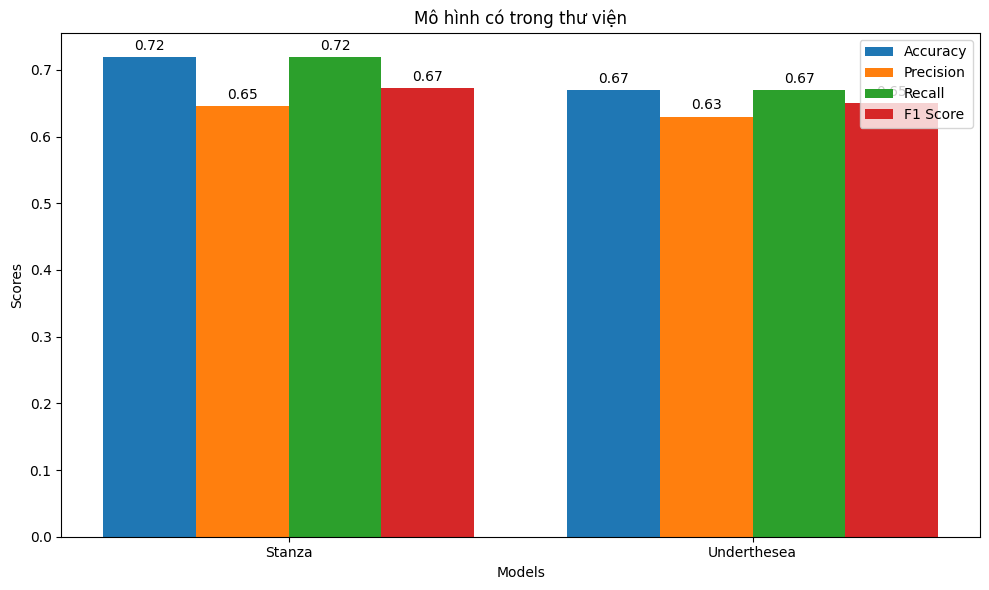

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Giả sử chúng ta có các kết quả cho 3 mô hình
models = ['Stanza','Underthesea']
accuracy = [classification_report_stanza['accuracy'],0.67]
precision = [classification_report_stanza['weighted avg']['precision'],0.63]
recall = [classification_report_stanza['weighted avg']['recall'],0.67]
f1_score = [classification_report_stanza['weighted avg']['f1-score'],0.65]

# Thiết lập vị trí các thanh trên trục x
x = np.arange(len(models))  # vị trí các nhãn trên trục x
width = 0.2  # độ rộng của các thanh

fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ các thanh
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_score, width, label='F1 Score')

# Thêm các nhãn và tiêu đề
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Mô hình có trong thư viện')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Thêm các giá trị trên các thanh
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

fig.tight_layout()
plt.show()


## Học máy(Dùng thư viện học máy)

### RandomForestClassifier

In [26]:
import pandas as pd

# Đọc file Parquet vào DataFrame
df = pd.read_parquet('0000.parquet')

# Chỉ lấy 200 dòng đầu tiên
df = df.head(200)

# Tiếp tục xử lý dữ liệu như thông thường
df['sentence'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))
df['Ner'] = df['ner_tags'].apply(lambda tokens: ' '.join(tokens))

# Chuyển đổi dữ liệu
X = []
y = []

for idx, row in df.iterrows():
    words = row['sentence'].split()  # Tách các từ trong câu
    labels = row['Ner'].split()  # Tách các nhãn tương ứng

    for word, label in zip(words, labels):
        X.append({'word': word})  # Thêm từ vào danh sách X
        y.append(label)  # Thêm nhãn vào danh sách y

# In ra và kiểm tra kết quả (in ra tối đa 200 dòng)
# for i in range(min(len(X), 200)): # Lấy 200 dữ liệu
#     print(X[i], y[i])
for i in range(len(X)):
    print(X[i], y[i])

{'word': 'Đồng'} O
{'word': 'thời'} O
{'word': ','} O
{'word': 'bệnh'} O
{'word': 'viện'} O
{'word': 'tiếp'} O
{'word': 'tục'} O
{'word': 'thực'} O
{'word': 'hiện'} O
{'word': 'các'} O
{'word': 'biện'} O
{'word': 'pháp'} O
{'word': 'phòng'} O
{'word': 'chống'} O
{'word': 'dịch'} O
{'word': 'bệnh'} O
{'word': 'COVID'} O
{'word': '-'} O
{'word': '19'} O
{'word': 'theo'} O
{'word': 'hướng'} O
{'word': 'dẫn'} O
{'word': 'của'} O
{'word': 'Bộ'} B-ORGANIZATION
{'word': 'Y'} I-ORGANIZATION
{'word': 'tế'} I-ORGANIZATION
{'word': '.'} O
{'word': '"'} O
{'word': 'Số'} O
{'word': 'bệnh'} O
{'word': 'viện'} O
{'word': 'có'} O
{'word': 'thể'} O
{'word': 'tiếp'} O
{'word': 'nhận'} O
{'word': 'bệnh'} O
{'word': 'nhân'} O
{'word': 'bị'} O
{'word': 'sốt'} B-SYMPTOM_AND_DISEASE
{'word': 'cao'} I-SYMPTOM_AND_DISEASE
{'word': 'và'} O
{'word': 'khó'} B-SYMPTOM_AND_DISEASE
{'word': 'thở'} I-SYMPTOM_AND_DISEASE
{'word': 'đang'} O
{'word': 'giảm'} O
{'word': 'dần'} O
{'word': '"'} O
{'word': ','} O
{'word': '

In [27]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Biểu diễn các đặc trưng dưới dạng vector
vectorizer = DictVectorizer(sparse=False)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vectorized, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred_rf = rf_model.predict(X_test_vectorized)
# Đánh giá mô hình
print(classification_report(y_test, y_pred_rf))

                       precision    recall  f1-score   support

                B-AGE       0.00      0.00      0.00         6
               B-DATE       0.42      0.57      0.48        14
             B-GENDER       0.50      0.25      0.33         4
                B-JOB       0.00      0.00      0.00         2
           B-LOCATION       0.53      0.54      0.53        37
               B-NAME       1.00      0.25      0.40         4
       B-ORGANIZATION       0.90      0.64      0.75        14
         B-PATIENT_ID       0.73      0.29      0.41        28
B-SYMPTOM_AND_DISEASE       0.90      0.64      0.75        14
     B-TRANSPORTATION       1.00      1.00      1.00         1
               I-DATE       0.58      0.44      0.50        16
                I-JOB       0.00      0.00      0.00         4
           I-LOCATION       0.68      0.52      0.58        97
               I-NAME       0.00      0.00      0.00         1
       I-ORGANIZATION       0.38      0.14      0.20  

d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
import requests
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier

# Hàm để chuyển đổi câu nhập vào thành định dạng vector
def sentence_to_features(sentence):
    words = sentence.split()  # Tách câu thành các từ
    features = []
    for word in words:
        features.append({'word': word})  # Biểu diễn mỗi từ dưới dạng {'word': 'từ'}
    return features

# Hàm để dự đoán nhãn cho câu nhập vào
def predict_labels(sentence, vectorizer, model):
    # Chuyển đổi câu nhập vào thành định dạng vector
    sentence_features = sentence_to_features(sentence)
    sentence_vectorized = vectorizer.transform(sentence_features)
    
    # Dự đoán nhãn cho câu nhập vào
    predicted_label = model.predict(sentence_vectorized)
    return predicted_label

# Ví dụ câu nhập vào
input_sentence = "Bệnh nhân 129 là nam , 20 tuổi , địa chỉ ở Nghĩa Tân , Hà Nội , là du học sinh tại Anh , nhập cảnh về Nội Bài ngày 20 - 3 trên chuyến bay VN 0054 ."

# Chuyển đổi câu nhập vào thành vector
input_features = sentence_to_features(input_sentence)

# Biểu diễn các đặc trưng dưới dạng vector
X_input_vectorized = vectorizer.transform(input_features)

# Dự đoán nhãn cho câu nhập vào bằng mô hình đã huấn luyện
predicted_label = rf_model.predict(X_input_vectorized)

print(f"Câu nhập vào: {input_sentence}")
print(f"Nhãn dự đoán: {predicted_label}")


Câu nhập vào: Bệnh nhân 129 là nam , 20 tuổi , địa chỉ ở Nghĩa Tân , Hà Nội , là du học sinh tại Anh , nhập cảnh về Nội Bài ngày 20 - 3 trên chuyến bay VN 0054 .
Nhãn dự đoán: ['O' 'O' 'B-PATIENT_ID' 'O' 'B-GENDER' 'O' 'B-PATIENT_ID' 'O' 'O' 'O' 'O'
 'O' 'B-LOCATION' 'B-LOCATION' 'O' 'B-LOCATION' 'I-LOCATION' 'O' 'O' 'O'
 'I-JOB' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'I-LOCATION' 'I-LOCATION' 'O'
 'B-PATIENT_ID' 'O' 'I-DATE' 'O' 'O' 'O' 'B-TRANSPORTATION'
 'I-TRANSPORTATION' 'O']


In [29]:
# Ví dụ câu nhập vào
input_sentence = "Đó là con đường biển ngắn nhất để đi từ Ấn Độ Dương sang Thái Bình Dương."

# Chuyển đổi câu nhập vào thành vector
input_features = sentence_to_features(input_sentence)

# Biểu diễn các đặc trưng dưới dạng vector
X_input_vectorized = vectorizer.transform(input_features)

# Dự đoán nhãn cho câu nhập vào bằng mô hình đã huấn luyện
predicted_label = rf_model.predict(X_input_vectorized)

print(f"Câu nhập vào: {input_sentence}")
print(f"Nhãn dự đoán: {predicted_label}")

Câu nhập vào: Đó là con đường biển ngắn nhất để đi từ Ấn Độ Dương sang Thái Bình Dương.
Nhãn dự đoán: ['O' 'O' 'O' 'B-LOCATION' 'O' 'O' 'O' 'O' 'O' 'O' 'B-LOCATION'
 'I-LOCATION' 'I-LOCATION' 'O' 'I-LOCATION' 'I-LOCATION' 'O']


### svm

In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Đọc file Parquet vào DataFrame
df = pd.read_parquet('0000.parquet')

# Chỉ lấy 200 dòng đầu tiên
df = df.head(200)

# Tiếp tục xử lý dữ liệu như thông thường
df['sentence'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))
df['Ner'] = df['ner_tags'].apply(lambda tokens: ' '.join(tokens))

# Chuyển đổi dữ liệu
X = []
y = []

for idx, row in df.iterrows():
    words = row['sentence'].split()  # Tách các từ trong câu
    labels = row['Ner'].split()  # Tách các nhãn tương ứng

    for word, label in zip(words, labels):
        X.append({'word': word})  # Thêm từ vào danh sách X
        y.append(label)  # Thêm nhãn vào danh sách y

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
y_train

['O',
 'O',
 'B-PATIENT_ID',
 'I-LOCATION',
 'O',
 'B-PATIENT_ID',
 'I-LOCATION',
 'O',
 'O',
 'O',
 'I-LOCATION',
 'O',
 'I-ORGANIZATION',
 'O',
 'O',
 'O',
 'O',
 'B-LOCATION',
 'O',
 'O',
 'O',
 'O',
 'O',
 'I-LOCATION',
 'O',
 'B-PATIENT_ID',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'I-LOCATION',
 'O',
 'O',
 'O',
 'I-LOCATION',
 'O',
 'I-LOCATION',
 'O',
 'B-GENDER',
 'B-PATIENT_ID',
 'B-PATIENT_ID',
 'O',
 'O',
 'B-LOCATION',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-NAME',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'I-LOCATION',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'I-LOCATION',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'I-LOCATION',
 'O',
 'O',
 'I-ORGANIZATION',
 'O',
 'I-SYMPTOM_AND_DISEASE',
 'O',
 'I-LOCATION',
 'I-LOCATION',
 'O',
 'O',
 'B-DATE',
 'O',
 'O',
 'I-SYMPTOM_AND_DISEASE',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'I-LOCATI

In [38]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Đọc file Parquet vào DataFrame
df = pd.read_parquet('0000.parquet')

# Chỉ lấy 200 dòng đầu tiên
df = df.head(200)

# Tiếp tục xử lý dữ liệu như thông thường
df['sentence'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))
df['Ner'] = df['ner_tags'].apply(lambda tokens: ' '.join(tokens))

# Chuyển đổi dữ liệu
X = []
y = []

for idx, row in df.iterrows():
    words = row['sentence'].split()  # Tách các từ trong câu
    labels = row['Ner'].split()  # Tách các nhãn tương ứng

    for word, label in zip(words, labels):
        X.append({'word': word})  # Thêm từ vào danh sách X
        y.append(label)  # Thêm nhãn vào danh sách y

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Biểu diễn các đặc trưng dưới dạng vector
vectorizer = DictVectorizer(sparse=False)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Khởi tạo mô hình SVM
svm_model = SVC(kernel='linear')  # Chọn kernel 'linear', có thể thay đổi kernel tùy theo bài toán

# Huấn luyện mô hình SVM
svm_model.fit(X_train_vectorized, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred_svm = svm_model.predict(X_test_vectorized)

# Đánh giá mô hình SVM
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

# Ví dụ câu nhập vào
input_sentence = "Bệnh nhân 129 là nam , 20 tuổi , địa chỉ ở Nghĩa Tân , Hà Nội , là du học sinh tại Anh , nhập cảnh về Nội Bài ngày 20 - 3 trên chuyến bay VN 0054 ."

# Hàm để chuyển đổi câu nhập vào thành định dạng vector
def sentence_to_features(sentence):
    words = sentence.split()  # Tách câu thành các từ
    features = []
    for word in words:
        features.append({'word': word})  # Biểu diễn mỗi từ dưới dạng {'word': 'từ'}
    return features

# Hàm để dự đoán nhãn cho câu nhập vào
def predict_labels(sentence, vectorizer, model):
    # Chuyển đổi câu nhập vào thành định dạng vector
    sentence_features = sentence_to_features(sentence)
    sentence_vectorized = vectorizer.transform(sentence_features)
    
    # Dự đoán nhãn cho câu nhập vào
    predicted_label = model.predict(sentence_vectorized)
    return predicted_label

# Chuyển đổi câu nhập vào thành vector
input_features = sentence_to_features(input_sentence)

# Biểu diễn các đặc trưng dưới dạng vector
X_input_vectorized = vectorizer.transform(input_features)

# Dự đoán nhãn cho câu nhập vào bằng mô hình SVM đã huấn luyện
predicted_label_svm = svm_model.predict(X_input_vectorized)

print(f"\nCâu nhập vào: {input_sentence}")
print(f"Nhãn dự đoán (SVM): {predicted_label_svm}")


In [31]:
# Ví dụ câu nhập vào
input_sentence = "Đó là con đường biển ngắn nhất để đi từ Ấn Độ Dương sang Thái Bình Dương."

# Hàm để chuyển đổi câu nhập vào thành định dạng vector
def sentence_to_features(sentence):
    words = sentence.split()  # Tách câu thành các từ
    features = []
    for word in words:
        features.append({'word': word})  # Biểu diễn mỗi từ dưới dạng {'word': 'từ'}
    return features

# Hàm để dự đoán nhãn cho câu nhập vào
def predict_labels(sentence, vectorizer, model):
    # Chuyển đổi câu nhập vào thành định dạng vector
    sentence_features = sentence_to_features(sentence)
    sentence_vectorized = vectorizer.transform(sentence_features)
    
    # Dự đoán nhãn cho câu nhập vào
    predicted_label = model.predict(sentence_vectorized)
    return predicted_label

# Chuyển đổi câu nhập vào thành vector
input_features = sentence_to_features(input_sentence)

# Biểu diễn các đặc trưng dưới dạng vector
X_input_vectorized = vectorizer.transform(input_features)

# Dự đoán nhãn cho câu nhập vào bằng mô hình SVM đã huấn luyện
predicted_label_svm = svm_model.predict(X_input_vectorized)

print(f"\nCâu nhập vào: {input_sentence}")
print(f"Nhãn dự đoán (SVM): {predicted_label_svm}")


Câu nhập vào: Đó là con đường biển ngắn nhất để đi từ Ấn Độ Dương sang Thái Bình Dương.
Nhãn dự đoán (SVM): ['O' 'O' 'O' 'B-LOCATION' 'O' 'O' 'O' 'O' 'O' 'O' 'B-LOCATION'
 'I-LOCATION' 'I-LOCATION' 'O' 'I-LOCATION' 'I-LOCATION' 'O']


### LogisticRegression

In [32]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Đọc file Parquet vào DataFrame
df = pd.read_parquet('0000.parquet')

# Chỉ lấy 200 dòng đầu tiên
df = df.head(200)

# Tiếp tục xử lý dữ liệu như thông thường
df['sentence'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))
df['Ner'] = df['ner_tags'].apply(lambda tokens: ' '.join(tokens))

# Chuyển đổi dữ liệu
X = []
y = []

for idx, row in df.iterrows():
    words = row['sentence'].split()  # Tách các từ trong câu
    labels = row['Ner'].split()  # Tách các nhãn tương ứng

    for word, label in zip(words, labels):
        X.append({'word': word})  # Thêm từ vào danh sách X
        y.append(label)  # Thêm nhãn vào danh sách y

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Biểu diễn các đặc trưng dưới dạng vector
vectorizer = DictVectorizer(sparse=False)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Khởi tạo mô hình Logistic Regression
lr_model = LogisticRegression(max_iter=1000)  # max_iter tùy chọn để đảm bảo hội tụ

# Huấn luyện mô hình Logistic Regression
lr_model.fit(X_train_vectorized, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred_lr = lr_model.predict(X_test_vectorized)

# Đánh giá mô hình Logistic Regression
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

# Ví dụ câu nhập vào
input_sentence = "Bệnh nhân 129 là nam , 20 tuổi , địa chỉ ở Nghĩa Tân , Hà Nội , là du học sinh tại Anh , nhập cảnh về Nội Bài ngày 20 - 3 trên chuyến bay VN 0054 ."

# Hàm để chuyển đổi câu nhập vào thành định dạng vector
def sentence_to_features(sentence):
    words = sentence.split()  # Tách câu thành các từ
    features = []
    for word in words:
        features.append({'word': word})  # Biểu diễn mỗi từ dưới dạng {'word': 'từ'}
    return features

# Hàm để dự đoán nhãn cho câu nhập vào
def predict_labels(sentence, vectorizer, model):
    # Chuyển đổi câu nhập vào thành định dạng vector
    sentence_features = sentence_to_features(sentence)
    sentence_vectorized = vectorizer.transform(sentence_features)
    
    # Dự đoán nhãn cho câu nhập vào
    predicted_label = model.predict(sentence_vectorized)
    return predicted_label

# Chuyển đổi câu nhập vào thành vector
input_features = sentence_to_features(input_sentence)

# Biểu diễn các đặc trưng dưới dạng vector
X_input_vectorized = vectorizer.transform(input_features)

# Dự đoán nhãn cho câu nhập vào bằng mô hình Logistic Regression đã huấn luyện
predicted_label_lr = lr_model.predict(X_input_vectorized)

print(f"\nCâu nhập vào: {input_sentence}")
print(f"Nhãn dự đoán (Logistic Regression): {predicted_label_lr}")


Classification Report (Logistic Regression):
                       precision    recall  f1-score   support

                B-AGE       0.00      0.00      0.00         6
               B-DATE       0.20      0.07      0.11        14
             B-GENDER       0.50      0.25      0.33         4
                B-JOB       0.00      0.00      0.00         2
           B-LOCATION       0.58      0.30      0.39        37
               B-NAME       0.00      0.00      0.00         4
       B-ORGANIZATION       1.00      0.29      0.44        14
         B-PATIENT_ID       0.00      0.00      0.00        28
B-SYMPTOM_AND_DISEASE       0.75      0.21      0.33        14
     B-TRANSPORTATION       0.00      0.00      0.00         1
               I-DATE       0.50      0.31      0.38        16
                I-JOB       0.00      0.00      0.00         4
           I-LOCATION       0.70      0.47      0.56        97
               I-NAME       0.00      0.00      0.00         1
       I-

d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
# Ví dụ câu nhập vào
input_sentence = "Đó là con đường biển ngắn nhất để đi từ Ấn Độ Dương sang Thái Bình Dương."

# Hàm để chuyển đổi câu nhập vào thành định dạng vector
def sentence_to_features(sentence):
    words = sentence.split()  # Tách câu thành các từ
    features = []
    for word in words:
        features.append({'word': word})  # Biểu diễn mỗi từ dưới dạng {'word': 'từ'}
    return features

# Hàm để dự đoán nhãn cho câu nhập vào
def predict_labels(sentence, vectorizer, model):
    # Chuyển đổi câu nhập vào thành định dạng vector
    sentence_features = sentence_to_features(sentence)
    sentence_vectorized = vectorizer.transform(sentence_features)
    
    # Dự đoán nhãn cho câu nhập vào
    predicted_label = model.predict(sentence_vectorized)
    return predicted_label

# Chuyển đổi câu nhập vào thành vector
input_features = sentence_to_features(input_sentence)

# Biểu diễn các đặc trưng dưới dạng vector
X_input_vectorized = vectorizer.transform(input_features)

# Dự đoán nhãn cho câu nhập vào bằng mô hình Logistic Regression đã huấn luyện
predicted_label_lr = lr_model.predict(X_input_vectorized)

print(f"\nCâu nhập vào: {input_sentence}")
print(f"Nhãn dự đoán (Logistic Regression): {predicted_label_lr}")



Câu nhập vào: Đó là con đường biển ngắn nhất để đi từ Ấn Độ Dương sang Thái Bình Dương.
Nhãn dự đoán (Logistic Regression): ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'I-LOCATION' 'O' 'O'
 'I-LOCATION' 'O']


### ID3

In [21]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Đọc file Parquet vào DataFrame
df = pd.read_parquet('0000.parquet')

# Chỉ lấy 200 dòng đầu tiên
df = df.head(200)

# Tiếp tục xử lý dữ liệu như thông thường
df['sentence'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))
df['Ner'] = df['ner_tags'].apply(lambda tokens: ' '.join(tokens))

# Chuyển đổi dữ liệu
X = []
y = []

for idx, row in df.iterrows():
    words = row['sentence'].split()  # Tách các từ trong câu
    labels = row['Ner'].split()  # Tách các nhãn tương ứng

    for word, label in zip(words, labels):
        X.append({'word': word})  # Thêm từ vào danh sách X
        y.append(label)  # Thêm nhãn vào danh sách y

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Biểu diễn các đặc trưng dưới dạng vector
vectorizer = DictVectorizer(sparse=False)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Khởi tạo và huấn luyện mô hình ID3
id3_model = DecisionTreeClassifier()
id3_model.fit(X_train_vectorized, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred_id3 = id3_model.predict(X_test_vectorized)

# Đánh giá mô hình ID3
print("Classification Report (ID3):")
print(classification_report(y_test, y_pred_id3))

# Ví dụ câu nhập vào
input_sentence = "Bệnh nhân 129 là nam , 20 tuổi , địa chỉ ở Nghĩa Tân , Hà Nội , là du học sinh tại Anh , nhập cảnh về Nội Bài ngày 20 - 3 trên chuyến bay VN 0054 ."

# Hàm để chuyển đổi câu nhập vào thành định dạng vector
def sentence_to_features(sentence):
    words = sentence.split()  # Tách câu thành các từ
    features = []
    for word in words:
        features.append({'word': word})  # Biểu diễn mỗi từ dưới dạng {'word': 'từ'}
    return features

# Hàm để dự đoán nhãn cho câu nhập vào
def predict_labels(sentence, vectorizer, model):
    # Chuyển đổi câu nhập vào thành định dạng vector
    sentence_features = sentence_to_features(sentence)
    sentence_vectorized = vectorizer.transform(sentence_features)

    # Dự đoán nhãn cho câu nhập vào
    predicted_label = model.predict(sentence_vectorized)
    return predicted_label

# Chuyển đổi câu nhập vào thành vector
input_features = sentence_to_features(input_sentence)

# Biểu diễn các đặc trưng dưới dạng vector
X_input_vectorized = vectorizer.transform(input_features)

# Dự đoán nhãn cho câu nhập vào bằng mô hình ID3 đã huấn luyện
predicted_label_id3 = id3_model.predict(X_input_vectorized)

print(f"\nCâu nhập vào: {input_sentence}")
print(f"Nhãn dự đoán (ID3): {predicted_label_id3}")


Classification Report (ID3):
                       precision    recall  f1-score   support

                B-AGE       0.00      0.00      0.00         6
               B-DATE       0.48      0.71      0.57        14
             B-GENDER       0.50      0.25      0.33         4
                B-JOB       0.00      0.00      0.00         2
           B-LOCATION       0.49      0.62      0.55        37
               B-NAME       0.50      0.25      0.33         4
       B-ORGANIZATION       0.90      0.64      0.75        14
         B-PATIENT_ID       0.67      0.29      0.40        28
B-SYMPTOM_AND_DISEASE       0.90      0.64      0.75        14
     B-TRANSPORTATION       1.00      1.00      1.00         1
               I-DATE       0.50      0.44      0.47        16
                I-JOB       0.00      0.00      0.00         4
           I-LOCATION       0.67      0.49      0.57        97
               I-NAME       0.00      0.00      0.00         1
       I-ORGANIZATION    

d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
# Ví dụ câu nhập vào
input_sentence = "Đó là con đường biển ngắn nhất để đi từ Ấn Độ Dương sang Thái Bình Dương."

# Hàm để chuyển đổi câu nhập vào thành định dạng vector
def sentence_to_features(sentence):
    words = sentence.split()  # Tách câu thành các từ
    features = []
    for word in words:
        features.append({'word': word})  # Biểu diễn mỗi từ dưới dạng {'word': 'từ'}
    return features

# Hàm để dự đoán nhãn cho câu nhập vào
def predict_labels(sentence, vectorizer, model):
    # Chuyển đổi câu nhập vào thành định dạng vector
    sentence_features = sentence_to_features(sentence)
    sentence_vectorized = vectorizer.transform(sentence_features)

    # Dự đoán nhãn cho câu nhập vào
    predicted_label = model.predict(sentence_vectorized)
    return predicted_label

# Chuyển đổi câu nhập vào thành vector
input_features = sentence_to_features(input_sentence)

# Biểu diễn các đặc trưng dưới dạng vector
X_input_vectorized = vectorizer.transform(input_features)

# Dự đoán nhãn cho câu nhập vào bằng mô hình ID3 đã huấn luyện
predicted_label_id3 = id3_model.predict(X_input_vectorized)

print(f"\nCâu nhập vào: {input_sentence}")
print(f"Nhãn dự đoán (ID3): {predicted_label_id3}")


Câu nhập vào: Đó là con đường biển ngắn nhất để đi từ Ấn Độ Dương sang Thái Bình Dương.
Nhãn dự đoán (ID3): ['O' 'O' 'O' 'B-LOCATION' 'O' 'O' 'O' 'O' 'O' 'O' 'B-LOCATION'
 'I-LOCATION' 'I-LOCATION' 'O' 'I-LOCATION' 'I-LOCATION' 'O']


### Đánh giá 

In [7]:
from sklearn.metrics import classification_report

# In và lấy classification report
classification_svm = classification_report(y_test, y_pred_svm, output_dict=True)
classification_id3=classification_report(y_test, y_pred_id3, output_dict=True)
classification_lr=classification_report(y_test, y_pred_lr, output_dict=True)
classification_rf=classification_report(y_test, y_pred_rf, output_dict=True)

d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricW

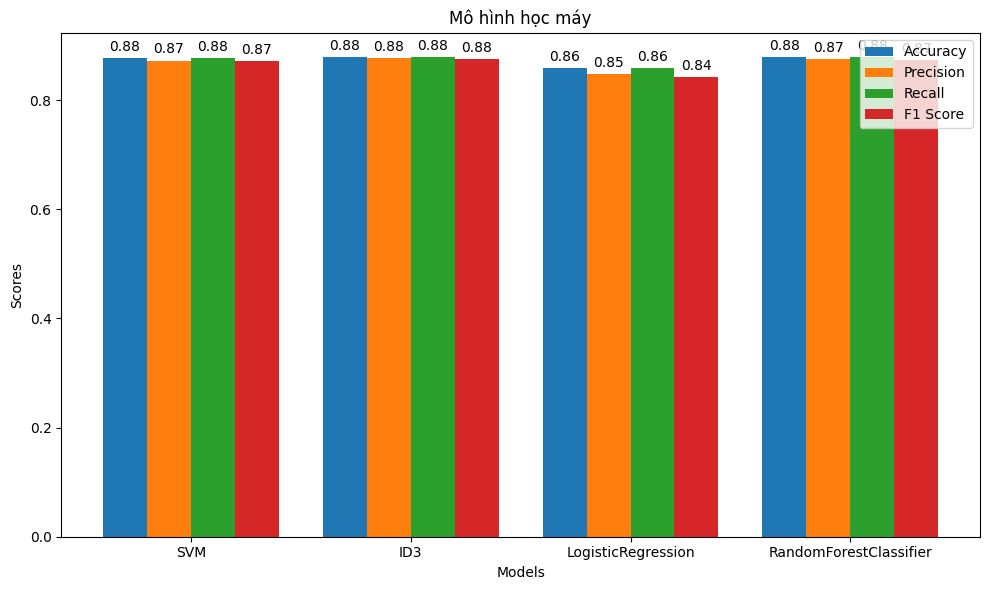

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Giả sử chúng ta có các kết quả cho 3 mô hình
models = ['SVM','ID3','LogisticRegression','RandomForestClassifier']
accuracy = [classification_svm['accuracy'],classification_id3['accuracy'],classification_lr['accuracy'],classification_rf['accuracy']]
precision = [classification_svm['weighted avg']['precision'],classification_id3['weighted avg']['precision'],classification_lr['weighted avg']['precision'],classification_rf['weighted avg']['precision']]
recall = [classification_svm['weighted avg']['recall'],classification_id3['weighted avg']['recall'],classification_lr['weighted avg']['recall'],classification_rf['weighted avg']['recall']]
f1_score = [classification_svm['weighted avg']['f1-score'],classification_id3['weighted avg']['f1-score'],classification_lr['weighted avg']['f1-score'],classification_rf['weighted avg']['f1-score']]

# Thiết lập vị trí các thanh trên trục x
x = np.arange(len(models))  # vị trí các nhãn trên trục x
width = 0.2  # độ rộng của các thanh

fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ các thanh
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_score, width, label='F1 Score')

# Thêm các nhãn và tiêu đề
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Mô hình học máy')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Thêm các giá trị trên các thanh
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

fig.tight_layout()
plt.show()


## Đánh giá

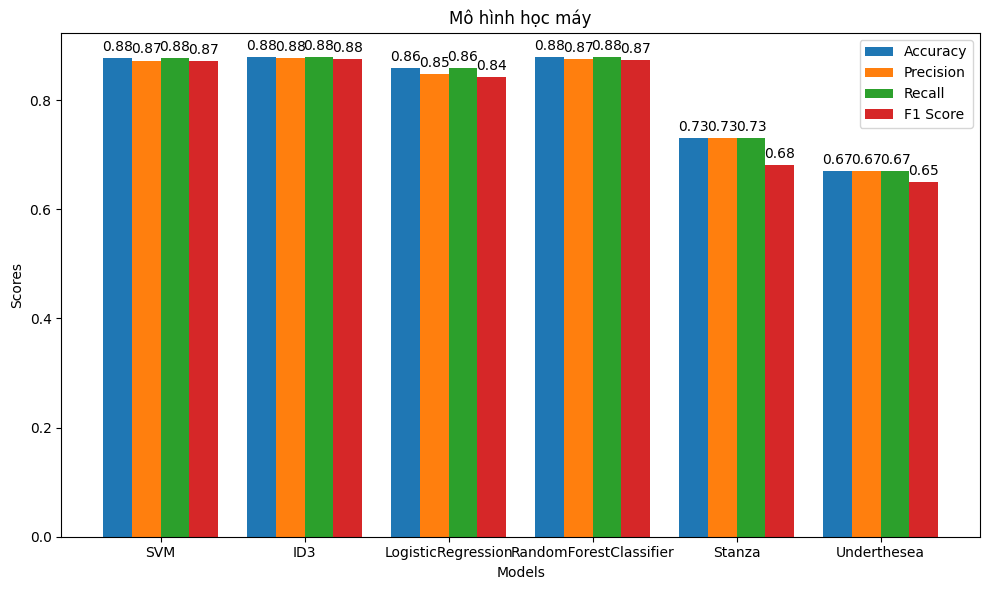

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Giả sử chúng ta có các kết quả cho 3 mô hình
models = ['SVM','ID3','LogisticRegression','RandomForestClassifier','Stanza','Underthesea']
accuracy = [classification_svm['accuracy'],classification_id3['accuracy'],classification_lr['accuracy'],classification_rf['accuracy'],classification_report_stanza['accuracy'],0.67]
precision = [classification_svm['weighted avg']['precision'],classification_id3['weighted avg']['precision'],classification_lr['weighted avg']['precision'],classification_rf['weighted avg']['precision'],classification_report_stanza['accuracy'],0.67]
recall = [classification_svm['weighted avg']['recall'],classification_id3['weighted avg']['recall'],classification_lr['weighted avg']['recall'],classification_rf['weighted avg']['recall'],classification_report_stanza['weighted avg']['recall'],0.67]
f1_score = [classification_svm['weighted avg']['f1-score'],classification_id3['weighted avg']['f1-score'],classification_lr['weighted avg']['f1-score'],classification_rf['weighted avg']['f1-score'],classification_report_stanza['weighted avg']['f1-score'],0.65]
# Thiết lập vị trí các thanh trên trục x
x = np.arange(len(models))  # vị trí các nhãn trên trục x
width = 0.2  # độ rộng của các thanh

fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ các thanh
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_score, width, label='F1 Score')

# Thêm các nhãn và tiêu đề
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Mô hình học máy')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Thêm các giá trị trên các thanh
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

fig.tight_layout()
plt.show()


## Học máy(Tạo thuật toán mô hình)

In [35]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Đọc file Parquet vào DataFrame
df = pd.read_parquet('0000.parquet')

# Chỉ lấy 1000 dòng đầu tiên
df = df.head(200)

# Tiếp tục xử lý dữ liệu như thông thường
df['sentence'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))
df['Ner'] = df['ner_tags'].apply(lambda tokens: ' '.join(tokens))

# Chuyển đổi dữ liệu
X = []
y = []

for idx, row in df.iterrows():
    words = row['sentence'].split()  # Tách các từ trong câu
    labels = row['Ner'].split()  # Tách các nhãn tương ứng

    for word, label in zip(words, labels):
        X.append({'word': word})  # Thêm từ vào danh sách X
        y.append(label)  # Thêm nhãn vào danh sách y

# Chuyển đổi dữ liệu thành numpy arrays
vectorizer = DictVectorizer(sparse=False)
X_np = vectorizer.fit_transform(X)
y_np = np.array(y)

# Chuyển nhãn thành số nguyên
class_mapping = {label: idx for idx, label in enumerate(np.unique(y_np))}
y_np = np.array([class_mapping[label] for label in y_np])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 8:2
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# Định nghĩa Node cho cây quyết định
class Node:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

# Định nghĩa lớp DecisionTreeClassifier từ đầu
class DecisionTreeClassifierScratch:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree_ = None

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _gini(self, y):
        m = len(y)
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in np.unique(y))

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(
            gini=self._gini(y),
            num_samples=len(y),
            num_samples_per_class=num_samples_per_class,
            predicted_class=predicted_class,
        )

        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None

        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((num / m) ** 2 for num in num_parent)
        best_idx, best_thr = None, None

        for idx in range(n):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.n_classes_))
                gini_right = 1.0 - sum((num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_))
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2

        return best_idx, best_thr

    def _predict(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

# Khởi tạo và huấn luyện mô hình ID3
tree = DecisionTreeClassifierScratch(max_depth=10)
tree.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = tree.predict(X_test)

# Đánh giá mô hình ID3
print("Classification Report (ID3 from scratch):")
print(classification_report(y_test, y_pred))

# Ví dụ câu nhập vào
input_sentence = "Bệnh nhân 129 là nam , 20 tuổi , địa chỉ ở Nghĩa Tân , Hà Nội , là du học sinh tại Anh , nhập cảnh về Nội Bài ngày 20 - 3 trên chuyến bay VN 0054 ."

# Hàm để chuyển đổi câu nhập vào thành định dạng vector
def sentence_to_features(sentence):
    words = sentence.split()  # Tách câu thành các từ
    features = []
    for word in words:
        features.append({'word': word})  # Biểu diễn mỗi từ dưới dạng {'word': 'từ'}
    return features

# Hàm để dự đoán nhãn cho câu nhập vào
def predict_labels(sentence, vectorizer, model):
    # Chuyển đổi câu nhập vào thành định dạng vector
    sentence_features = sentence_to_features(sentence)
    sentence_vectorized = vectorizer.transform(sentence_features)

    # Dự đoán nhãn cho câu nhập vào
    predicted_label = model.predict(sentence_vectorized)
    return predicted_label

# Chuyển đổi câu nhập vào thành vector
input_features = sentence_to_features(input_sentence)

# Biểu diễn các đặc trưng dưới dạng vector
X_input_vectorized = vectorizer.transform(input_features)

# Dự đoán nhãn cho câu nhập vào bằng mô hình ID3 đã huấn luyện
predicted_label_id3 = tree.predict(X_input_vectorized)

# Chuyển nhãn dự đoán từ số nguyên thành nhãn ban đầu
inverse_class_mapping = {v: k for k, v in class_mapping.items()}
predicted_label_id3 = [inverse_class_mapping[label] for label in predicted_label_id3]

print(f"\nCâu nhập vào: {input_sentence}")
print(f"Nhãn dự đoán (ID3): {predicted_label_id3}")


Classification Report (ID3 from scratch):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.80      0.11      0.19        37
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00        28
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00         1
          10       0.50      0.31      0.38        16
          12       0.00      0.00      0.00         4
          13       0.67      0.25      0.36        97
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00        37
          16       0.00      0.00      0.00        13
          17       0.00      0.00      

d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
# Ví dụ câu nhập vào
input_sentence = "Đó là con đường biển ngắn nhất để đi từ Ấn Độ Dương sang Thái Bình Dương."

# Hàm để chuyển đổi câu nhập vào thành định dạng vector
def sentence_to_features(sentence):
    words = sentence.split()  # Tách câu thành các từ
    features = []
    for word in words:
        features.append({'word': word})  # Biểu diễn mỗi từ dưới dạng {'word': 'từ'}
    return features

# Hàm để dự đoán nhãn cho câu nhập vào
def predict_labels(sentence, vectorizer, model):
    # Chuyển đổi câu nhập vào thành định dạng vector
    sentence_features = sentence_to_features(sentence)
    sentence_vectorized = vectorizer.transform(sentence_features)

    # Dự đoán nhãn cho câu nhập vào
    predicted_label = model.predict(sentence_vectorized)
    return predicted_label

# Chuyển đổi câu nhập vào thành vector
input_features = sentence_to_features(input_sentence)

# Biểu diễn các đặc trưng dưới dạng vector
X_input_vectorized = vectorizer.transform(input_features)

# Dự đoán nhãn cho câu nhập vào bằng mô hình ID3 đã huấn luyện
predicted_label_id3 = tree.predict(X_input_vectorized)

# Chuyển nhãn dự đoán từ số nguyên thành nhãn ban đầu
inverse_class_mapping = {v: k for k, v in class_mapping.items()}
predicted_label_id3 = [inverse_class_mapping[label] for label in predicted_label_id3]

print(f"\nCâu nhập vào: {input_sentence}")
print(f"Nhãn dự đoán (ID3): {predicted_label_id3}")



Câu nhập vào: Đó là con đường biển ngắn nhất để đi từ Ấn Độ Dương sang Thái Bình Dương.
Nhãn dự đoán (ID3): ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [37]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Đọc file Parquet vào DataFrame
df = pd.read_parquet('0000.parquet')

# Chỉ lấy 1000 dòng đầu tiên
df = df.head(1000)

# Tiếp tục xử lý dữ liệu như thông thường
df['sentence'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))
df['Ner'] = df['ner_tags'].apply(lambda tokens: ' '.join(tokens))

# Chuyển đổi dữ liệu
X = []
y = []

for idx, row in df.iterrows():
    words = row['sentence'].split()  # Tách các từ trong câu
    labels = row['Ner'].split()  # Tách các nhãn tương ứng

    for word, label in zip(words, labels):
        X.append({'word': word})  # Thêm từ vào danh sách X
        y.append(label)  # Thêm nhãn vào danh sách y

# Chuyển đổi dữ liệu thành numpy arrays
vectorizer = DictVectorizer(sparse=False)
X_np = vectorizer.fit_transform(X)
y_np = np.array(y)

# Chuyển nhãn thành số nguyên
class_mapping = {label: idx for idx, label in enumerate(np.unique(y_np))}
y_np = np.array([class_mapping[label] for label in y_np])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 8:2
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# Định nghĩa Node cho cây quyết định
class Node:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

# Định nghĩa lớp DecisionTreeClassifier từ đầu
class DecisionTreeClassifierScratch:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree_ = None

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _gini(self, y):
        m = len(y)
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in np.unique(y))

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(
            gini=self._gini(y),
            num_samples=len(y),
            num_samples_per_class=num_samples_per_class,
            predicted_class=predicted_class,
        )

        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None

        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((num / m) ** 2 for num in num_parent)
        best_idx, best_thr = None, None

        for idx in range(n):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.n_classes_))
                gini_right = 1.0 - sum((num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_))
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2

        return best_idx, best_thr

    def _predict(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

# Khởi tạo và huấn luyện mô hình ID3
tree = DecisionTreeClassifierScratch(max_depth=10)
tree.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = tree.predict(X_test)

# Đánh giá mô hình ID3
print("Classification Report (ID3 from scratch):")
print(classification_report(y_test, y_pred))

# Ví dụ câu nhập vào
input_sentence = "Bệnh nhân 129 là nam , 20 tuổi , địa chỉ ở Nghĩa Tân , Hà Nội , là du học sinh tại Anh , nhập cảnh về Nội Bài ngày 20 - 3 trên chuyến bay VN 0054 ."

# Hàm để chuyển đổi câu nhập vào thành định dạng vector
def sentence_to_features(sentence):
    words = sentence.split()  # Tách câu thành các từ
    features = []
    for word in words:
        features.append({'word': word})  # Biểu diễn mỗi từ dưới dạng {'word': 'từ'}
    return features

# Hàm để dự đoán nhãn cho câu nhập vào
def predict_labels(sentence, vectorizer, model):
    # Chuyển đổi câu nhập vào thành định dạng vector
    sentence_features = sentence_to_features(sentence)
    sentence_vectorized = vectorizer.transform(sentence_features)

    # Dự đoán nhãn cho câu nhập vào
    predicted_label = model.predict(sentence_vectorized)
    return predicted_label

# Chuyển đổi câu nhập vào thành vector
input_features = sentence_to_features(input_sentence)

# Biểu diễn các đặc trưng dưới dạng vector
X_input_vectorized = vectorizer.transform(input_features)

# Dự đoán nhãn cho câu nhập vào bằng mô hình ID3 đã huấn luyện
predicted_label_id3 = tree.predict(X_input_vectorized)

# Chuyển nhãn dự đoán từ số nguyên thành nhãn ban đầu
inverse_class_mapping = {v: k for k, v in class_mapping.items()}
predicted_label_id3 = [inverse_class_mapping[label] for label in predicted_label_id3]

print(f"\nCâu nhập vào: {input_sentence}")
print(f"Nhãn dự đoán (ID3): {predicted_label_id3}")


KeyboardInterrupt: 